### Кто онлайн в сообществе iRootHelp?

In [1]:
import requests
import matplotlib.pyplot as plt

access_token = 'vk1.a.uvPRgKgu_CzL54_5yTKsuvEfsHXDSIYxoxNF-vvEBD8mOcxfJn4PNYbcFF8NSupi_D2gVfJK6VviKBgg0HOzB3-WHXrYRvvG5Wgd8i7Vc0jcUkDTod48YmJIuIoP69IqZfq0LZE63NxstgoLc5W_ikdS2b_Ea4vWq5-383XIPQEZMrMu2nncVABlAr8-_Ei90Blbj75CowLfDYQXhxfNtw'
group_id = '30444828'
api_version = '5.131'

url = f'https://api.vk.com/method/groups.getMembers?group_id={group_id}&fields=online&access_token={access_token}&v={api_version}'

response = requests.get(url)
data = response.json()

if 'response' in data:
    members = data['response']['items']
    users_all = data['response']
    online_members = [member for member in members if member.get('online') == 1]
    print(f"Список пользователей онлайн ({len(online_members)} человек) в группе {group_id}:")
    for member in online_members:
        print(f"- {member['first_name']} {member['last_name']}")
else:
    print("Ошибка при выполнении запроса.")

# Собрать все идентификаторы пользователей в указанном сообществе

# Получение списка идентификаторов пользователей в группе
members_url = f'https://api.vk.com/method/groups.getMembers?group_id={group_id}&access_token={access_token}&v={api_version}'
response = requests.get(members_url)
members_data = response.json()

if 'response' in members_data:
    member_ids = members_data['response']['items']

    # Формирование списка параметров для метода users.get
    user_ids = ','.join(str(user_id) for user_id in member_ids)
    users_url = f'https://api.vk.com/method/users.get?user_ids={user_ids}&access_token={access_token}&v={api_version}'
    response = requests.get(users_url)
    users_data = response.json()

    if 'response' in users_data:
        users = users_data['response']

        # Вывод имен и идентификаторов пользователей
        print(f"Список пользователей в группе {group_id} ({len(users)} пользователей):")
        for user in users:
            user_id = user['id']
            first_name = user['first_name']
            last_name = user['last_name']
            print(f"{first_name:15} {last_name:15} id: {user_id:9>}")
    else:
        print("Ошибка при получении данных пользователей.")
else:
    print("Ошибка при получении данных участников группы.")

# Вернуть всех друзей в сообществе, которые онлайн
url = f'https://api.vk.com/method/groups.getMembers?group_id={group_id}&fields=online&filter=friends&access_token={access_token}&v={api_version}'

response = requests.get(url)
data = response.json()

if 'response' in data:
    members = data['response']['items']
    online_friends = [member for member in members if member.get('online') == 1]
    print(f"Список ваших друзей, находящихся онлайн в группе {group_id} ({len(online_friends)} человек):")
    for friend in online_friends:
        print(f"- {friend['first_name']} {friend['last_name']}")
else:
    print("Ошибка при выполнении запроса.")

Список пользователей онлайн (7 человек) в группе 30444828:
- Иля Филин
- Вероника Чернова
- Саша Андреев
- Ярослав Крыжов
- Дима'транзистор Арсланбеков
- Максим Ващило
- Алёна Данилова
Список пользователей в группе 30444828 (318 пользователей):
Дмитрий         Жемчужный       id: 395950
Алексей         Захаров         id: 880840
Андрей          Ревин           id: 1524535
Каролина        Иваровская      id: 1600185
DELETED                         id: 1642754
Мария           Моисеева        id: 1658821
Светочка        Пронина         id: 1777410
Олька           Лямина          id: 1853723
Полина          Захаренко       id: 1871159
Ксюша           Павлова         id: 2014798
Максим          Судаков         id: 2365939
Нуржан          Казыбек         id: 2512092
Мария           Эливанова       id: 2871142
Иван            Тульчинский     id: 2985339
Ольга           Сушкова         id: 3677041
Екатерина       Рачкова         id: 4076937
Аленка          Харланчук       id: 4539553
Константи

### Визуализация

7 318 1


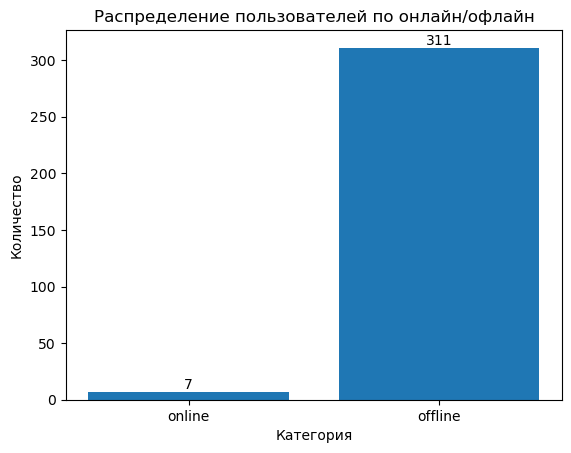

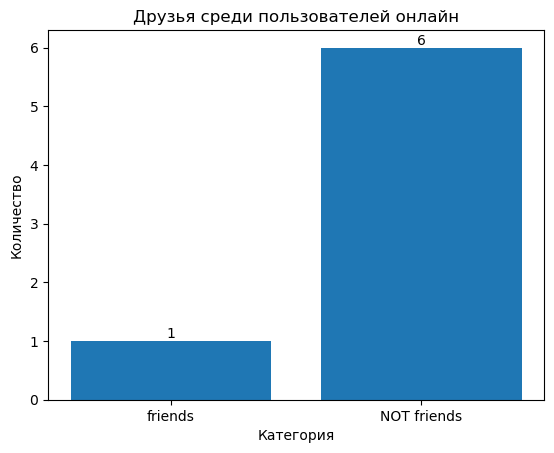

In [7]:
online = len(online_members)
n_users = len(users)
n_online_friends = len(online_friends)
print(online, n_users, n_online_friends)

# Распределение людей онлайн-офлайн
plt.bar(["online", "offline"], [online, n_users - online])
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.title('Распределение пользователей по онлайн/офлайн')
# plt.tick_params(axis='x', labelrotation=90)
for i, count in enumerate([online, n_users - online]):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

# Распределение друзей среди онлайн-пользователей
plt.bar(["friends", "NOT friends"], [n_online_friends, online - n_online_friends])
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.title('Друзья среди пользователей онлайн')
# plt.tick_params(axis='x', labelrotation=90)
for i, count in enumerate([n_online_friends, online - n_online_friends]):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

### Вывести все последние пять записей нашего сообщества iRootHelp

In [5]:
import requests

access_token = 'vk1.a.uvPRgKgu_CzL54_5yTKsuvEfsHXDSIYxoxNF-vvEBD8mOcxfJn4PNYbcFF8NSupi_D2gVfJK6VviKBgg0HOzB3-WHXrYRvvG5Wgd8i7Vc0jcUkDTod48YmJIuIoP69IqZfq0LZE63NxstgoLc5W_ikdS2b_Ea4vWq5-383XIPQEZMrMu2nncVABlAr8-_Ei90Blbj75CowLfDYQXhxfNtw'
group_id = '30444828'
api_version = '5.131'

url = f'https://api.vk.com/method/wall.get?owner_id=-{group_id}&count=5&access_token={access_token}&v={api_version}'

response = requests.get(url)
data = response.json()

if 'response' in data:
    posts = data['response']['items']
    print(f"Последние 5 записей в группе {group_id}:")
    for post in posts:
        text = post['text']
        print(f"- {text}")
        print("-"*50)
else:
    print("Ошибка при выполнении запроса.")


Последние 5 записей в группе 30444828:
- ЕСТЬ ЛИ МНЕ ЧТО ТУТ ЛОВИТЬ?

- Думаю, если Вы являетесь подписчиком данного сообщества, то возможно, если остаетесь не равнодушными и верите в нас!

Не могу сказать дату точного начала продолжения работы, но в любом случае это будет в этом году. Прошу прощения за столь долгий период отсутствия, были на это свои причины. В любом случае, были пересмотрели многие вещи и новый RH, никогда уже не станет прежним... 

Кто ждет этого момента, проголосуйте просто в опросе! Спасибо Вам, за то что посчитали нужным оставить нас у себя в сообществах.
--------------------------------------------------
- Я люблю Вас! Это первое, что хотелось бы мне сказать, от всего коллектива RootHelp и от себя. 💪🏻

Во-вторых, хочу поздравить всех с наступающим Новым Годом! Ведь праздник уже близко и все готовятся, создается праздничная обстановка вокруг которой так и хочется крутиться. 

Ребят, с наступающим Вас праздником - счастья, здоровья, любви, а остальное за Вами! 

#